In [2]:
import pandas as pd
from gmpy2 import mpz

# plotting:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# for handling SettingWithCopyWarning
from pandas.core.common import SettingWithCopyWarning
import warnings

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

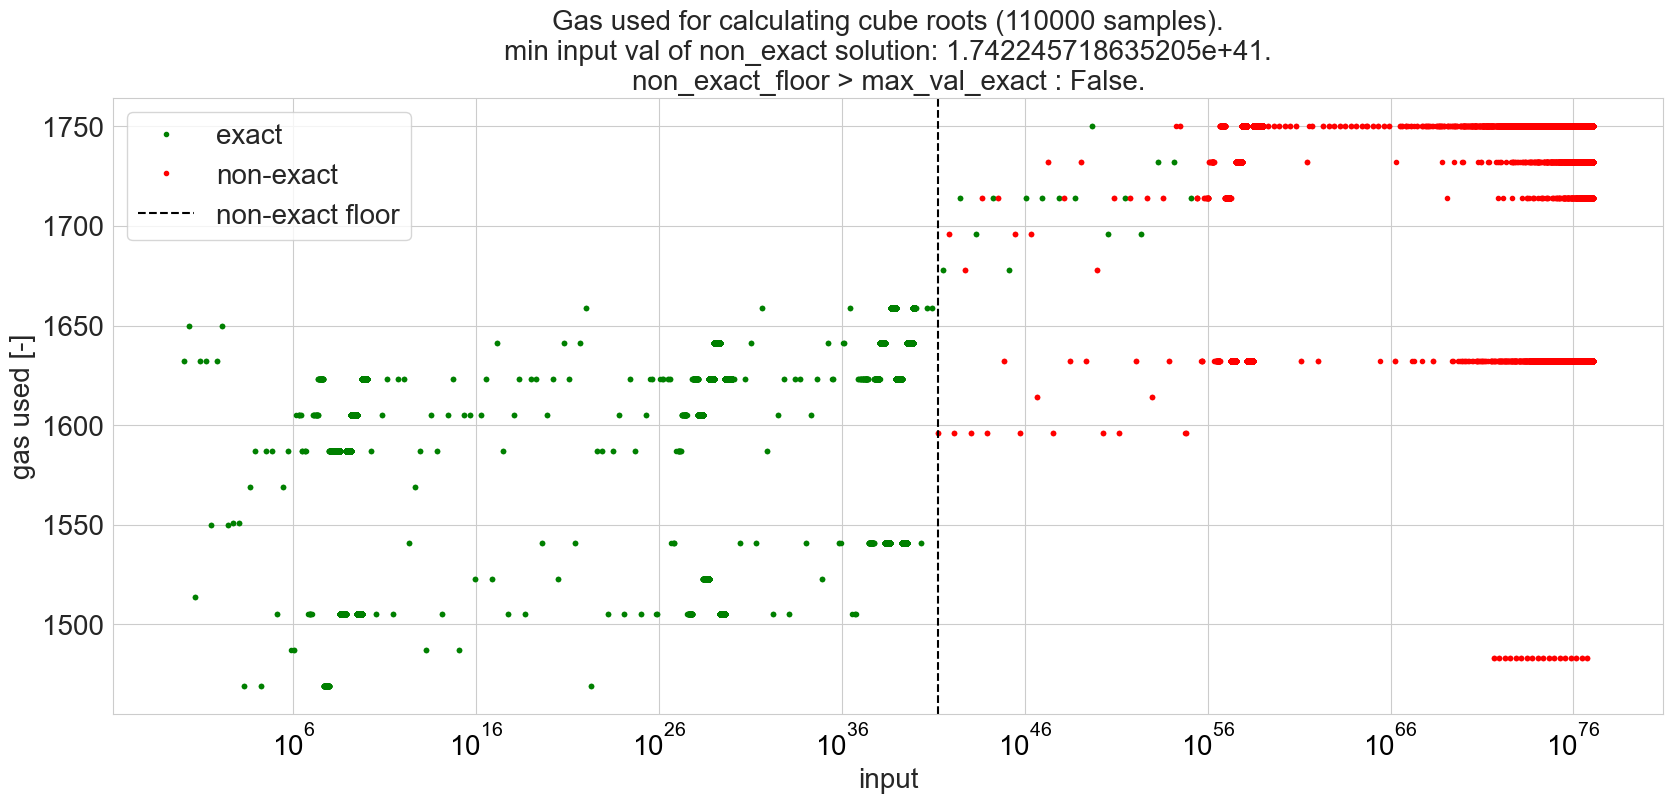

In [3]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

data = pd.read_csv(f"../../data/cbrt_analysis.csv")
data["input"] = data["input"].apply(lambda x: mpz(x))
data["cbrt_ideal"] = data["cbrt_ideal"].apply(lambda x: mpz(x))
data["cbrt_implementation"] = data["cbrt_implementation"].apply(lambda x: mpz(x))
data["diff_ideal_impl"] = data["cbrt_ideal"] - data["cbrt_implementation"]
data["abs_diff_ideal_impl"] = data["diff_ideal_impl"].abs()

ax.plot(
    data[data.diff_ideal_impl == 0].input,
    data[data.diff_ideal_impl == 0].gasused,
    '.',
    color="green",
    label="exact"
)

ax.plot(
    data[data.diff_ideal_impl != 0].input,
    data[data.diff_ideal_impl != 0].gasused,
    '.',
    color="red",
    label="non-exact"
)

# also plot errors for numbers within range:
max_val_exact = data[data.diff_ideal_impl == 0].input.max()
non_exact_floor = float(data[(data.diff_ideal_impl != 0)].input.min())
reverts_val_lt_exact = data[(data.cbrt_implementation == -1) & (data.input < max_val_exact)]

good_range = non_exact_floor > max_val_exact

# non_exact_floor should be higher than max_val_exact always

if not reverts_val_lt_exact.empty:

    ax.plot(
        reverts_val_lt_exact.input,
        reverts_val_lt_exact.gasused,
        'x',
        color="red",
        label="reverts"
    )

ax.axvline(x=non_exact_floor, color="black", linestyle="--", label="non-exact floor")
ax.set_xlabel("input", fontsize=20)
ax.set_ylabel("gas used [-]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black');
ax.set_xscale("log")
ax.legend(fontsize=20)
ax.set_title(
    f"Gas used for calculating cube roots ({data.shape[0]} samples).\n"
    f"min input val of non_exact solution: {non_exact_floor}.\n"
    f"non_exact_floor > max_val_exact : {good_range}.",
    fontsize=20
);

In [4]:
data.astype(float).describe()

,input,cbrt_ideal,cbrt_implementation,gasused,diff_ideal_impl,abs_diff_ideal_impl
count,1.100000e+05,1.100000e+05,1.100000e+05,110000.000000,1.100000e+05,1.100000e+05
mean,2.066564e+76,1.390092e+37,2.057458e+31,1674.742264,1.390090e+37,1.390090e+37
std,3.354928e+76,1.807050e+37,1.922089e+31,80.609133,1.807049e+37,1.807049e+37
min,1.000000e+00,1.000000e+12,0.000000e+00,1469.000000,0.000000e+00,0.000000e+00
25%,7.482975e+29,9.078723e+21,9.067637e+21,1623.000000,0.000000e+00,0.000000e+00
50%,4.978242e+58,3.678680e+31,2.393322e+31,1659.000000,5.039195e+05,5.039195e+05
75%,3.376151e+76,3.232019e+37,3.965263e+31,1750.000000,3.232016e+37,3.232016e+37
max,1.157890e+77,4.874040e+37,4.874055e+31,1750.000000,4.874036e+37,4.874036e+37


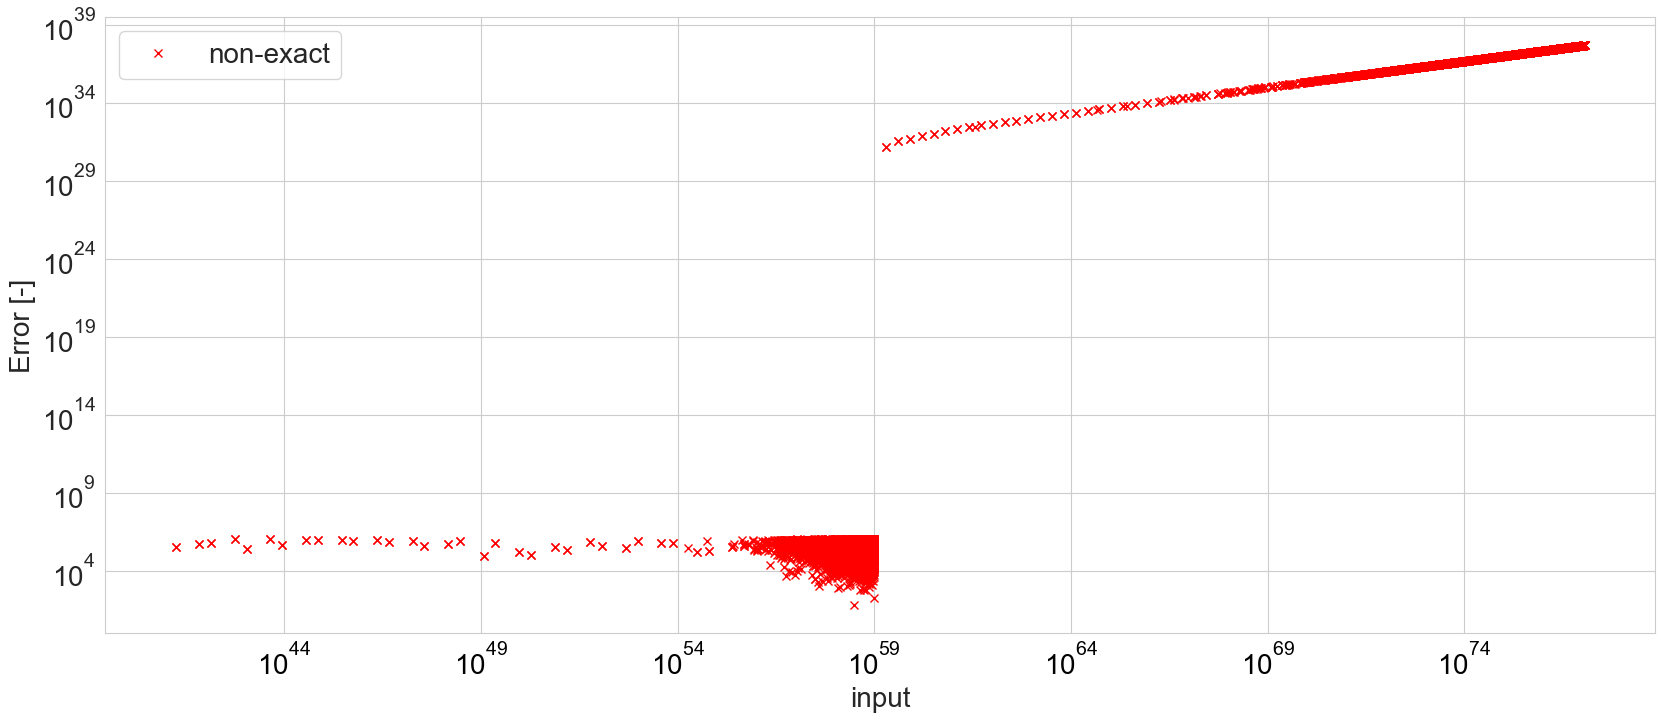

In [5]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.plot(
    data[data.diff_ideal_impl != 0].input,
    data[data.diff_ideal_impl != 0].diff_ideal_impl,
    'x',
    color="red",
    label="non-exact"
)
ax.set_xlabel("input", fontsize=20)
ax.set_ylabel("Error [-]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black');
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend(fontsize=20)